In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class MaximizeVariance:
    def __init__(self):
        self.pos = 0
    
    def reset(self):
        self.pos = 0
        return self.pos
    
    def get_available_actions(self):
        if self.pos == 0:
            return [0, 1]
        elif self.pos == 1:
            return list(range(10))
    
    def step(self, action):
        if self.pos == 0:
            if action == 0:  # move left
                self.pos = 1
                reward = 0
                done = 0
            elif action == 1:  # move right
                self.pos = 2
                reward = 0
                done = 1
        elif self.pos == 1:
            self.pos = 2
            reward = np.random.normal(-0.1, 1)
            done = 1

        return self.pos, reward, done

In [3]:
Q = [np.zeros(2), np.zeros(10), np.zeros(1)]
alpha = 0.1
gamma = 1
epsilon = 0.1

episodes = 300

In [4]:
def select_action(Q, state):
    if np.random.rand() < epsilon:
        return np.random.choice(len(Q[state]))
    else:
        return np.argmax(Q[state])

In [5]:
class QLearning:
    def __init__(self, do=False):
        self.Q = [np.zeros(2), np.zeros(10), np.zeros(1)]
        self.alpha = 0.1
        self.gamma = 1
        self.epsilon = 0.1

        if do:
            self.do()
        
    def select_action(self, state):
        if np.random.rand() < epsilon:
            return np.random.choice(len(self.Q[state]))
        else:
            max_action_index = np.where(self.Q[state] == np.max(self.Q[state]))[0]
            return np.random.choice(max_action_index)
        
    def do(self):
        env = MaximizeVariance()
        self.actions = []

        for episode in range(episodes):
            state = env.reset()
            done = False
            for step in range(100):
                action = self.select_action(state)
                if step == 0:
                    self.actions.append(action)
                next_state, reward, done = env.step(action)
                self.Q[state][action] += self.alpha * (reward + self.gamma * np.max(self.Q[next_state]) - self.Q[state][action])
                state = next_state
                if done:
                    break

In [6]:
class Double_QLearning:
    def __init__(self, do=False):
        self.Q1 = [np.zeros(2), np.zeros(10), np.zeros(1)]
        self.Q2 = [np.zeros(2), np.zeros(10), np.zeros(1)]
        self.alpha = 0.1
        self.gamma = 1
        self.epsilon = 0.1

        if do:
            self.do()
        
    def select_action(self, Q_s):
        if np.random.rand() < epsilon:
            return np.random.choice(len(Q_s))
        else:
            max_action_index = np.where(Q_s == np.max(Q_s))[0]
            return np.random.choice(max_action_index)
        
    def do(self):
        env = MaximizeVariance()
        self.actions = []

        for episode in range(episodes):
            state = env.reset()
            done = False
            for step in range(100):
                action = self.select_action(self.Q1[state]+self.Q2[state])
                if step == 0:
                    self.actions.append(action)
                next_state, reward, done = env.step(action)
                if np.random.rand() < 0.5:
                    self.Q1[state][action] += self.alpha * (reward + self.gamma * self.Q2[next_state][np.argmax(self.Q1[next_state])] - self.Q1[state][action])
                else:
                    self.Q2[state][action] += self.alpha * (reward + self.gamma * self.Q1[next_state][np.argmax(self.Q2[next_state])] - self.Q2[state][action])
                state = next_state
                if done:
                    break

In [7]:
QLearnings = [QLearning(do=True) for _ in range(1000)]
QLearnings_actions = [s.actions for s in QLearnings]

Double_QLearnings = [Double_QLearning(do=True) for _ in range(1000)]
Double_QLearnings_actions = [s.actions for s in Double_QLearnings]

In [8]:
QLearning_actions = np.array(QLearnings_actions)
Double_QLearning_actions = np.array(Double_QLearnings_actions)

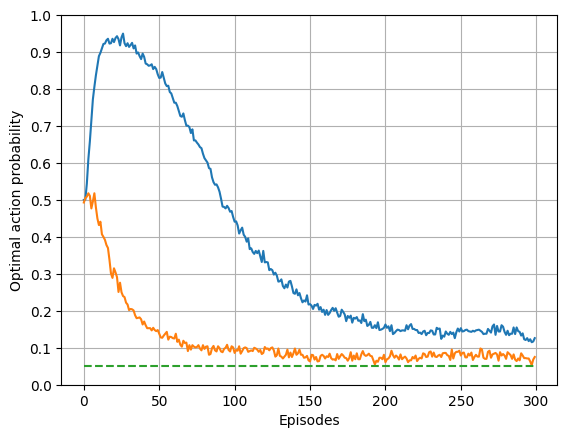

In [9]:
plt.plot(1-np.mean(QLearning_actions, axis=0))
plt.plot(1-np.mean(Double_QLearning_actions, axis=0))
plt.plot(np.zeros(300)+0.05, '--')
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Episodes')
plt.ylabel('Optimal action probability')
plt.grid()
plt.show()